<a href="https://colab.research.google.com/github/shubham-hub/Rossmann-Sales-Prediction/blob/main/Capstone_Project_2_Shubham_Chavhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Import the required libraries**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")

## **Mount Google Drive**


In [ ]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Getting data from CSV file using Pandas**

In [ ]:
#Importing the 2 datasets
df_Sales = pd.read_csv('/content/drive/MyDrive/Retail Sales Dataset - Regression /Rossmann Stores Data.csv')
df_Store = pd.read_csv('/content/drive/MyDrive/Retail Sales Dataset - Regression /store.csv')

In [ ]:
df_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### We have two sets of data. One contains data of sales and customer while the another dataset contains store description.We stored them in variables **'df_Sales'** and **'df_Store'** respectively.

## **For Sales dataframe.**

In [ ]:
df_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_Sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Check for duplicate rows 
len(df_Sales[df_Sales.duplicated()])

0

In [ ]:
len(df_Sales[df_Sales['Sales'] < 0])

0

In [ ]:
len(df_Sales[df_Sales['Sales'] == 0])

172871

In [ ]:
len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Open'] == 1)])

54

In [ ]:
len(df_Sales[(df_Sales['Sales'] != 0)&(df_Sales['Open'] == 0)])

0

In [ ]:
len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Open'] == 0)])

172817

In [ ]:
len(df_Sales[df_Sales['Customers'] < 0])

0

In [ ]:
len(df_Sales[df_Sales['Customers'] == 0])

172869

In [ ]:
len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Customers'] == 0)])

172869

In [ ]:
len(df_Sales[(df_Sales['Sales'] != 0)&(df_Sales['Customers'] == 0)])

0

In [ ]:
sales_column = ['Promo','Open','SchoolHoliday','StateHoliday']
sales_counts = pd.DataFrame(df_Sales[sales_column].melt(var_name='column', value_name='value').value_counts()).rename(columns={0: 'counts'}).sort_values(by=['column', 'counts'])
sales_counts

counts
column        value        
Open          0      172817
              1      844392
Promo         1      388080
              0      629129
SchoolHoliday 1      181721
              0      835488
StateHoliday  c        4100
              b        6690
              a       20260
              0      131072
              0      855087

In [ ]:
null_sales_values = df_Sales.isnull().sum()
null_sales_values.sort_values(ascending=False)

SchoolHoliday    0
StateHoliday     0
Promo            0
Open             0
Customers        0
Sales            0
Date             0
DayOfWeek        0
Store            0
dtype: int64

In [ ]:
df_Sales['Date'] = pd.to_datetime(df_Sales.Date)

In [ ]:
# extract year, month, day and week of year from "Date"
df_Sales['Year'] =pd.DatetimeIndex(df_Sales.Date).year
df_Sales['Month'] =pd.DatetimeIndex(df_Sales.Date).month
df_Sales['Day'] =pd.DatetimeIndex(df_Sales.Date).day
df_Sales['WeekOfYear'] = pd.DatetimeIndex(df_Sales.Date).weekofyear

In [ ]:
df_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


##for second dataframe

In [ ]:
df_Store = pd.read_csv('/content/drive/MyDrive/Retail Sales Dataset - Regression /store.csv')

In [ ]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df_Store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_column = ['StoreType','Assortment','Promo2','PromoInterval']
store_counts = pd.DataFrame(df_Store[store_column].melt(var_name='column', value_name='value').value_counts()).rename(columns={0: 'counts'}).sort_values(by=['column', 'counts'])
store_counts

counts
column        value                   
Assortment    b                      9
              c                    513
              a                    593
Promo2        0                    544
              1                    571
PromoInterval Mar,Jun,Sept,Dec     106
              Feb,May,Aug,Nov      130
              Jan,Apr,Jul,Oct      335
StoreType     b                     17
              c                    148
              d                    348
              a                    602

In [ ]:
df_Sales['Store'].nunique()

1115

In [ ]:
df_Store['Store'].nunique()

1115

In [ ]:
len(df_Store[df_Store.duplicated()])

0

In [ ]:
len(df_Store[df_Store['CompetitionDistance'] < 0])

0

In [ ]:
len(df_Store[df_Store['CompetitionDistance'] == 0])

0

In [ ]:
# Missing data counts and percentage
print('Missing Data Count')
print(df_Store.isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_Store.isnull().sum().sort_values(ascending = False)/len(df_Store)*100,2))

Missing Data Count
CompetitionOpenSinceYear     354
CompetitionOpenSinceMonth    354
PromoInterval                  0
Promo2SinceYear                0
Promo2SinceWeek                0
Promo2                         0
CompetitionDistance            0
Assortment                     0
StoreType                      0
Store                          0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CompetitionOpenSinceYear     31.75
CompetitionOpenSinceMonth    31.75
PromoInterval                 0.00
Promo2SinceYear               0.00
Promo2SinceWeek               0.00
Promo2                        0.00
CompetitionDistance           0.00
Assortment                    0.00
StoreType                     0.00
Store                         0.00
dtype: float64


In [ ]:
df_Store[df_Store['Promo2']!=0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


In [ ]:
df_Store[df_Store['Promo2']==0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [ ]:
len(df_Store.loc[df_Store['Promo2SinceWeek']==0])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
df_Store.loc[df_Store['Promo2SinceYear']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
df_Store.loc[df_Store['PromoInterval']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


### The features Promo2SinceWeek, Promo2SincYear and PromoInterval are NaN for stores that didn't participate in Promo2(i.e. Promo2=0). 
###The lack of Promo2 means that all these features are unimportant.
###Hence, we can **replace NaN** values in these **3 features with 0.** 
### Zero will represent that the particular store didn't participate in Promo2.

In [ ]:
#for all 3 features Promo2SinceWeek, Promo2SincYear and PromoInterval

df_Store['Promo2SinceWeek'].fillna(0, inplace = True)
df_Store['Promo2SinceYear'].fillna(0, inplace = True)
df_Store['PromoInterval'].fillna(0, inplace = True)

KeyboardInterrupt: ignored

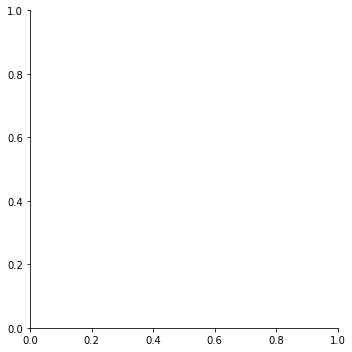

In [ ]:
#Plotting distribution of Competition Distance.

p=sns.displot(data = df_Store, x='CompetitionDistance',stat = 'density',kde=True,bins=70)
p.fig.set_dpi(100)
plt.title('Competition Distance Distribution',size = 13)
plt.xlabel('Competition Distance in meters',fontsize=11.5)
plt.show()

In [ ]:
Mean_Competition_Distance=df_Store['CompetitionDistance'].mean()
print(f'Most of stores have their competition distance in {Mean_Competition_Distance} Metre.')

Most of stores have their competition distance in 5404.901079136691 Metre.


###The figure above shows that most of the stores have their competition between 1km to 5km of their location.

In [ ]:
df_Store['CompetitionDistance'].fillna(str(df_Store['CompetitionDistance'].mean()),inplace=True)

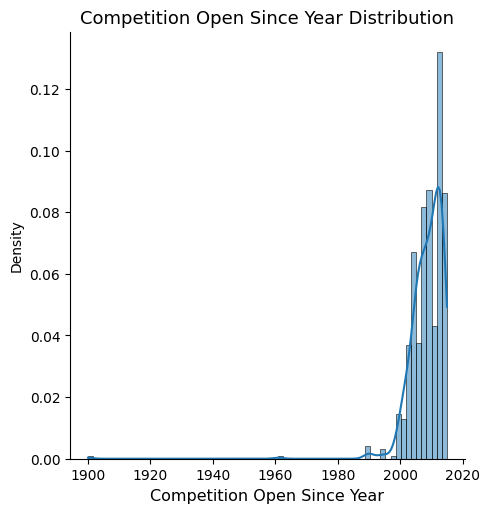

In [ ]:
#Plotting distribution of Competition Open Since Year.

p=sns.displot(data = df_Store, x='CompetitionOpenSinceYear', stat = 'density',kde=True,bins=70)
p.fig.set_dpi(100)
plt.title('Competition Open Since Year Distribution',size = 13)
plt.xlabel('Competition Open Since Year',fontsize=11.5)
plt.show()
#sns.distplot(df_store['CompetitionOpenSinceYear'])

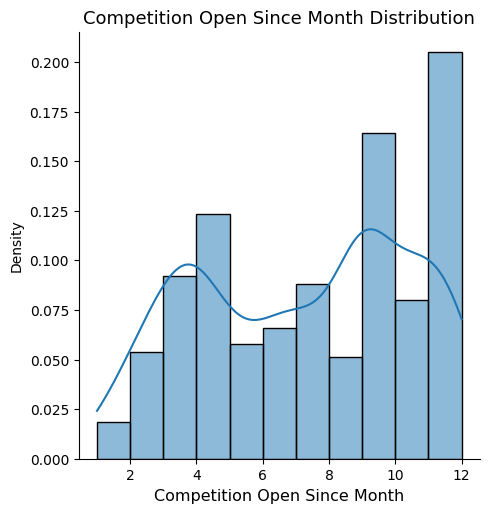

In [ ]:
p=sns.displot(data = df_Store, x='CompetitionOpenSinceMonth', stat = 'density',kde=True)
p.fig.set_dpi(100)
plt.title('Competition Open Since Month Distribution',size = 13)
plt.xlabel('Competition Open Since Month',fontsize=11.5)
plt.show()